<a href="https://colab.research.google.com/github/vhrique/ELF/blob/main/03_exploring_keywords_in_scopus_and_IEEE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [3]:
def convert_df_from_ieee(df):
    new_df = pd.DataFrame({})
    new_df['Title'] = df['Document Title']
    new_df['Authors'] = df.Authors
    new_df['Affiliations'] = df['Author Affiliations']
    new_df['Year'] = df['Publication Year']
    new_df['Abstract'] = df.Abstract
    new_df['ISSN'] = df.ISSN
    new_df['Keywords'] = df['Author Keywords']
    new_df['DOI'] = df.DOI
    return new_df

def convert_df_from_scopus(df):
    new_df = pd.DataFrame({})
    new_df['Title'] = df.Title
    new_df['Authors'] = df.Authors
    new_df['Affiliations'] = df.Affiliations
    new_df['Year'] = df.Year
    new_df['Abstract'] = df.Abstract
    new_df['ISSN'] = df.ISSN
    new_df['Keywords'] = df['Author Keywords']
    new_df['DOI'] = df.DOI
    return new_df

def read_csv(path):
    df = pd.read_csv(path)
    if 'IEEE Terms' in df.columns:
        return convert_df_from_ieee(df)
    else:
        return convert_df_from_scopus(df)

df1 = read_csv('/content/export2025.10.01-08.29.16.csv')
df2 = read_csv('/content/export_e8ea5107-0b6c-4665-b312-3a98bb8afa15_2025-10-01T123152.618506576.csv')

In [17]:
df = pd.concat([df1, df2]).drop_duplicates(subset='DOI')

In [ ]:
df.head()

,Title,Authors,Affiliations,Year,Abstract,ISSN,Keywords,DOI
0,Domain Adaptation Method for Gear RUL Predicti...,Y. Chen; K. Jiang; J. Lin,"School of Reliability and System Engineering, ...",2024,"In recent years, deep learning-based methods f...",NaN,RUL prediction;domain adaptation;convolutional...,10.1109/ONCON62778.2024.10931566
1,Dual Mix-up Adversarial Domain Adaptation for ...,Y. Dong; C. Zhou; Z. Wu; M. Cheng,University of Electronic Science and Technolog...,2022,Remaining useful life (RUL) prediction is one ...,2768-6515,RUL prediction;Adversarial domain adaptation;m...,10.1109/ICET55676.2022.9824464
2,Contrastive Adversarial Domain Adaptation for ...,M. Ragab; Z. Chen; M. Wu; C. S. Foo; C. K. Kwo...,"School of Computer Science, and Engineering, N...",2021,Enabling precise forecasting of the remaining ...,1941-0050,Domain adaptation;deep learning;remaining usef...,10.1109/TII.2020.3032690
3,Partial Domain Adaptation in Remaining Useful ...,X. Li; W. Zhang; X. Li; H. Hao,Key Laboratory of Education Ministry for Moder...,2024,Intelligent machinery prognostics and health m...,1941-014X,Deep learning;domain adaptation;incomplete tar...,10.1109/TMECH.2023.3325538
4,Weighted Adversarial Domain Adaptation for Mac...,K. Wu; J. Li; L. Zuo; K. Lu; H. T. Shen,"School of Computer Science and Engineering, Un...",2022,"In industry, accurate remaining useful life (R...",1557-9662,Deep learning;domain adaptation;remaining usef...,10.1109/TIM.2022.3212525


In [ ]:
df.tail()

,Title,Authors,Affiliations,Year,Abstract,ISSN,Keywords,DOI
73,Data-driven remaining useful life prediction b...,"B., Wen, Bingcheng; M., Xiao, Mingqing; X., Wa...","Air Force Engineering University China, Xi'an,...",2021,As an important part of prognostics and health...,23765992,Algorithms And Analysis Of Algorithms; Artific...,10.7717/peerj-cs.690
75,Bearing Remaining Useful Life Prediction Metho...,"X., Wang, Xin'gang; K., Han, Kaizhong; C., Wan...",School of Mechanical Engineering and Automatio...,2021,To address the problem that most bearing remai...,10053026,Bearing; Deep Learning; Domain Adaptation; Rem...,10.12068/j.issn.1005-3026.2021.05.009
76,Transferable convolutional neural network base...,"H., Cheng, Han; X., Kong, Xianguang; G., Chen,...","Xidian University, Xi'an, China",2021,Remaining useful life (RUL) prediction has bee...,02632241,Domain Invariance; Multiple Failure Behaviors;...,10.1016/j.measurement.2020.108286
81,Domain adaptation digital twin for rolling ele...,"C., Liu, Chenyu; A.R., Mauricio, Alexandre Ric...","KU Leuven, Leuven, Belgium; Flanders Make, Lom...",2020,Artificial Intelligence (AI) is escalating in ...,23250178,Condition Monitoring; Deep Learning; Forecasti...,10.36001/phmconf.2020.v12i1.1294
83,Remaining useful lifetime prediction via deep ...,"P.R., de Oliveira da Costa, Paulo Roberto; A.,...","Technische Universiteit Eindhoven, Eindhoven, ...",2020,In Prognostics and Health Management (PHM) suf...,09518320,Deep Learning; Domain Adaptation; Remaining Us...,10.1016/j.ress.2019.106682


In [ ]:
import itertools
from collections import defaultdict

def apriori(transactions, min_support=0.3):
    """
    transactions: list of lists (each transaction is a list of items)
    min_support: float, fraction of transactions
    """
    n_transactions = len(transactions)
    min_count = int(min_support * n_transactions)

    # Step 1: count individual items
    item_counts = defaultdict(int)
    for t in transactions:
        for item in t:
            item_counts[frozenset([item])] += 1

    # Keep only frequent items
    freq_itemsets = {k: v for k, v in item_counts.items() if v >= min_count}
    all_freq_itemsets = dict(freq_itemsets)

    k = 2
    while freq_itemsets:
        candidates = set()
        items = list(freq_itemsets.keys())
        for i in range(len(items)):
            for j in range(i+1, len(items)):
                union = items[i] | items[j]
                if len(union) == k:
                    candidates.add(union)

        # Count candidates
        candidate_counts = defaultdict(int)
        for t in transactions:
            tset = set(t)
            for c in candidates:
                if c.issubset(tset):
                    candidate_counts[c] += 1

        # Keep frequent
        freq_itemsets = {k: v for k, v in candidate_counts.items() if v >= min_count}
        all_freq_itemsets.update(freq_itemsets)

        k += 1

    # Convert counts to supports
    supports = {k: v/n_transactions for k, v in all_freq_itemsets.items()}
    return supports


def generate_rules(supports, min_conf=0.6):
    """
    supports: dict {frozenset: support}
    min_conf: minimum confidence threshold
    """
    rules = []
    for itemset in supports:
        if len(itemset) < 2:
            continue
        for i in range(1, len(itemset)):
            for antecedent in itertools.combinations(itemset, i):
                antecedent = frozenset(antecedent)
                consequent = itemset - antecedent
                conf = supports[itemset] / supports[antecedent]
                if conf >= min_conf:
                    rules.append({
                        'antecedent': antecedent,
                        'consequent': consequent,
                        'support': supports[itemset],
                        'confidence': conf,
                        'lift': conf / supports[consequent]
                    })
    return rules

In [ ]:
transactions = [[c.strip().lower() for c in t.split(";")] for t in df.Keywords if t == t]

supports = apriori(transactions, min_support=0.2)
print("Frequent itemsets:")
for k, v in supports.items():
    print(set(k), round(v, 2))

rules = generate_rules(supports, min_conf=0.6)
print("\nAssociation rules:")
for r in rules:
    print(f"{set(r['antecedent'])} -> {set(r['consequent'])}, "
          f"support={r['support']:.2f}, conf={r['confidence']:.2f}, lift={r['lift']:.2f}")

Frequent itemsets:
{'domain adaptation'} 0.59
{'deep learning'} 0.47
{'transfer learning'} 0.54
{'remaining useful life'} 0.21
{'remaining useful life prediction'} 0.25
{'remaining useful life predictions'} 0.29
{'forecasting'} 0.24
{'deep learning', 'domain adaptation'} 0.22
{'transfer learning', 'domain adaptation'} 0.23
{'deep learning', 'transfer learning'} 0.22
{'remaining useful life predictions', 'forecasting'} 0.2
{'remaining useful life predictions', 'domain adaptation'} 0.2

Association rules:
{'remaining useful life predictions'} -> {'forecasting'}, support=0.20, conf=0.68, lift=2.80
{'forecasting'} -> {'remaining useful life predictions'}, support=0.20, conf=0.81, lift=2.80
{'remaining useful life predictions'} -> {'domain adaptation'}, support=0.20, conf=0.68, lift=1.16


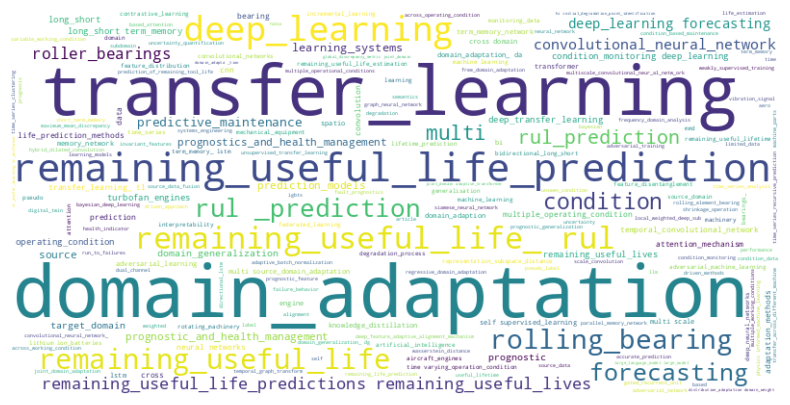

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

transactions = [[c.strip().lower().replace(' ', '_') for c in t.split(";")] for t in df.Keywords if t == t]
keywords = [' '.join(transaction) for transaction in transactions]

text = " ".join(keywords)

# Generate wordcloud
wc = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [6]:
import itertools
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

In [ ]:
def ngrams(s, n=3):
    """Generate n-grams from a string."""
    s = s.lower().strip().replace(" ", "")
    return set(s[i:i+n] for i in range(len(s)-n+1)) if len(s) >= n else {s}

def jaccard(a, b, n=3):
    """Compute Jaccard similarity between two strings using character n-grams."""
    A, B = ngrams(a, n), ngrams(b, n)
    return len(A & B) / len(A | B) if A and B else 0

In [ ]:
def merge_similar_words(transactions, threshold=0.8):
    # Flatten to count frequencies
    all_terms = [kw for t in transactions for kw in t]
    freq = Counter(all_terms)

    mapping = {}
    groups = []

    for word in sorted(freq, key=freq.get, reverse=True):
        if word in mapping:
            continue
        # start new group with most frequent term as representative
        rep = word
        group = [rep]
        mapping[word] = rep
        for other in freq:
            if other not in mapping and jaccard(word, other) >= threshold:
                mapping[other] = rep
                group.append(other)
        groups.append(group)

    # Apply mapping to transactions
    new_transactions = [[mapping[kw] for kw in t] for t in transactions]
    return new_transactions, groups

In [ ]:
transactions = [[c.strip().lower() for c in t.split(";")] for t in df.Keywords if t == t]

transactions, groups = merge_similar_words(transactions, threshold=0.5)

keyword_counts = Counter()
for t in transactions:
    for kw in set(t):   # use set to count once per document
        keyword_counts[kw] += 1

filtered_transactions = [
    [kw for kw in t if keyword_counts[kw] > 1]
    for t in transactions
]

# Drop empty transactions
transactions = [t for t in filtered_transactions if t]

pair_counts = Counter()
for t in transactions:
    # unique keywords in this transaction (avoid self-pair duplicates)
    t = list(set(t))
    for a, b in itertools.combinations(sorted(t), 2):
        pair_counts[(a, b)] += 1

print(pair_counts)

Counter({('domain adaptation', 'remaining useful life predictions'): 62, ('remaining useful life predictions', 'transfer learning'): 55, ('deep learning', 'remaining useful life predictions'): 47, ('domain adaptation', 'transfer learning'): 36, ('deep learning', 'domain adaptation'): 33, ('deep learning', 'transfer learning'): 32, ('forecasting', 'remaining useful life predictions'): 30, ('deep learning', 'forecasting'): 25, ('domain adaptation', 'forecasting'): 25, ('remaining useful life predictions', 'rolling bearings'): 21, ('forecasting', 'transfer learning'): 19, ('domain adaptation', 'rolling bearings'): 18, ('remaining useful life predictions', 'remaining useful lives'): 18, ('domain adaptation', 'rul prediction'): 14, ('forecasting', 'remaining useful lives'): 14, ('convolutional neural networks', 'remaining useful life predictions'): 13, ('rolling bearings', 'transfer learning'): 13, ('forecasting', 'rolling bearings'): 13, ('condition', 'remaining useful life predictions'): 

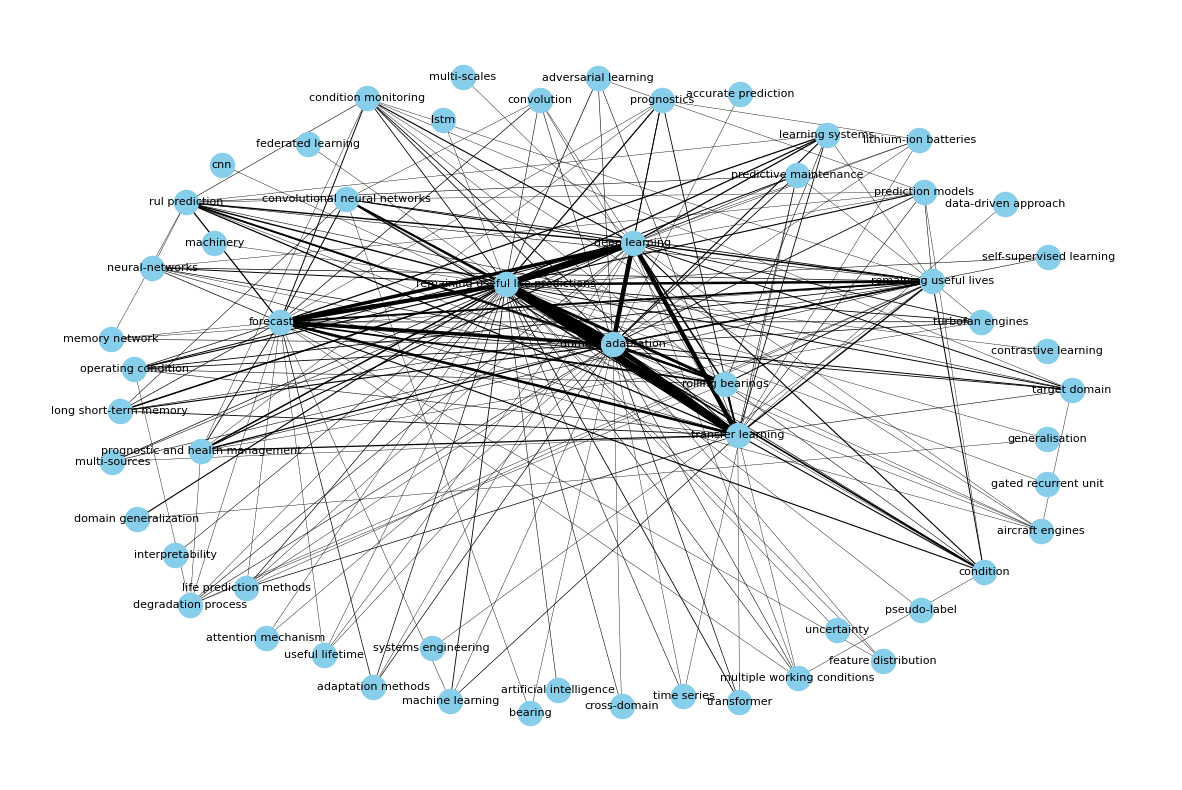

In [ ]:
# Create graph
G = nx.Graph()

# Add weighted edges
for (a, b), w in pair_counts.items():
    if w > 2:
        G.add_edge(a, b, weight=w)

# Draw graph (edge thickness = co-occurrence strength)
pos = nx.spring_layout(G, seed=42, k=5, scale=5)  # force-directed layout
plt.figure(figsize=(15, 10))

# Node styling
nx.draw_networkx_nodes(G, pos, node_size=300, node_color="skyblue")

# Edge styling
edges = G.edges(data=True)
nx.draw_networkx_edges(
    G, pos,
    edgelist=[(u, v) for u, v, d in edges],
    width=[d['weight']/10 for u, v, d in edges]
)

# Labels
nx.draw_networkx_labels(G, pos, font_size=8)

plt.axis("off")
plt.show()

In [8]:
import torch
from sklearn.cluster import HDBSCAN
from transformers import AutoModel, AutoTokenizer

In [9]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tokenizer = AutoTokenizer.from_pretrained('allenai/scibert_scivocab_uncased')
model = AutoModel.from_pretrained("allenai/scibert_scivocab_uncased").to(device)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/442M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/442M [00:00<?, ?B/s]

In [24]:
def get_encodings(entry, max_length=512):

    abstract = entry['Abstract'].lower()
    if entry['Keywords'] == entry['Keywords']:
        keywords = [kw.lower().strip() for kw in entry['Keywords'].split(';')]
    else:
        keywords = []

    abstract_tokens = tokenizer([f'abstract: {abstract}\n'], return_tensors="pt").input_ids
    input_token = torch.tensor([abstract_tokens[0][0]])
    end_token = torch.tensor([abstract_tokens[0][-1]])
    abstract_tokens = abstract_tokens[0][1:-1]
    keywords_tokens = [tokenizer([f'keyword: {keyword}\n'], return_tensors="pt").input_ids[0,1:-1] for keyword in keywords]
    input_tensors = torch.concat([input_token] + keywords_tokens + [abstract_tokens] + [end_token], dim=0)
    if len(input_tensors) >= max_length:
        input_tensors = torch.concat([input_tensors[:max_length-1]] + [end_token], dim=0)

    with torch.no_grad():
        model_outputs = model(input_tensors.unsqueeze(0).to(device))
        embeddings = model_outputs.last_hidden_state

    start = 1
    end = 1
    keywords_embeddings = []
    for keyword in keywords_tokens:
        start = end
        end = min(max_length-1, start + keyword.shape[0])
        keywords_embeddings.append(embeddings[0][start:end].mean(axis=0))
        if end == max_length-1:
            break

    start = end
    abstract_embedding = embeddings[0][start:-1].mean(axis=0)
    # abstract_embedding = model_outputs.pooler_output[0]

    return abstract_embedding, keywords_embeddings


In [25]:
from tqdm import tqdm

In [34]:
embeddings = []
doi = []
keyword_doi = []
keywords = []
keywords_embeddings = []

for i, entry in tqdm(df.iterrows(), total=df.shape[0]):

    abstract_embedding, keywords_emb = get_encodings(entry)
    doi.append(entry['DOI'])
    embeddings.append(abstract_embedding.tolist())

    if entry['Keywords'] != entry['Keywords']:
        continue

    for keyword, keyword_emb in zip(entry['Keywords'].split(';'), keywords_emb):
        keywords_embeddings.append(keyword_emb.tolist())
        keywords.append(keyword.lower().strip())
        keyword_doi.append(entry['DOI'])

100%|██████████| 137/137 [00:03<00:00, 41.11it/s]


In [30]:
import numpy as np

In [39]:
import umap

In [52]:
from sklearn.decomposition import PCA

In [59]:
from sklearn.manifold import TSNE

In [40]:
X2d = umap.UMAP(n_components=2).fit_transform(np.array(embeddings))

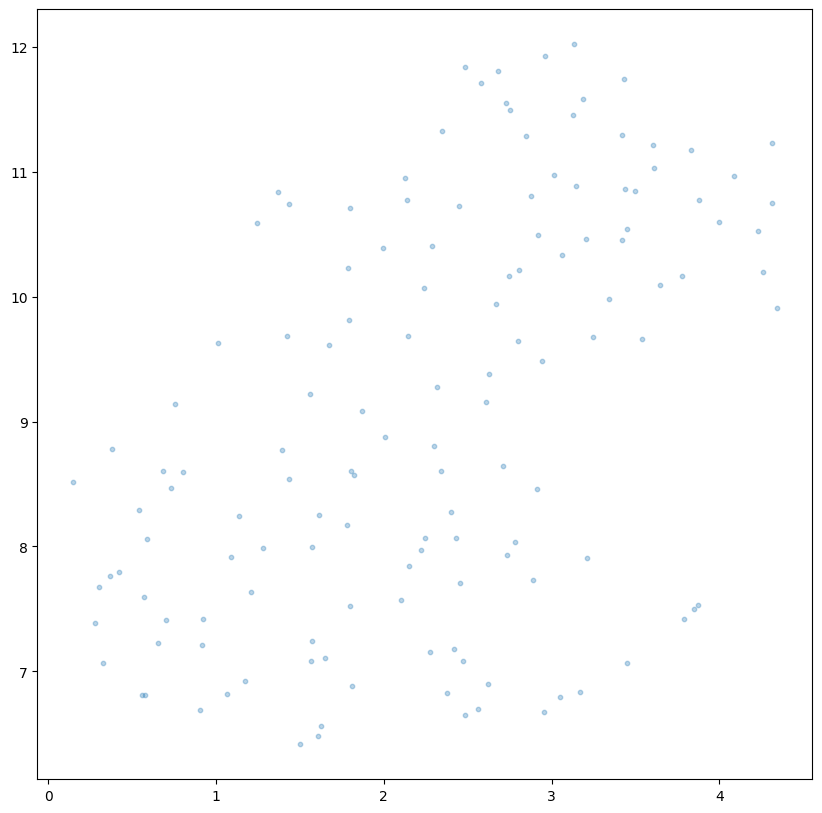

In [41]:
plt.figure(figsize=(10,10))
plt.scatter(X2d[:,0], X2d[:,1], s=10, alpha=0.3)
plt.show()

In [60]:
# X2d = PCA(n_components=2).fit_transform(np.array(keywords_embeddings))
X2d = TSNE(n_components=2).fit_transform(np.array(keywords_embeddings))
# X2d = umap.UMAP(n_components=2).fit_transform(np.array(keywords_embeddings))

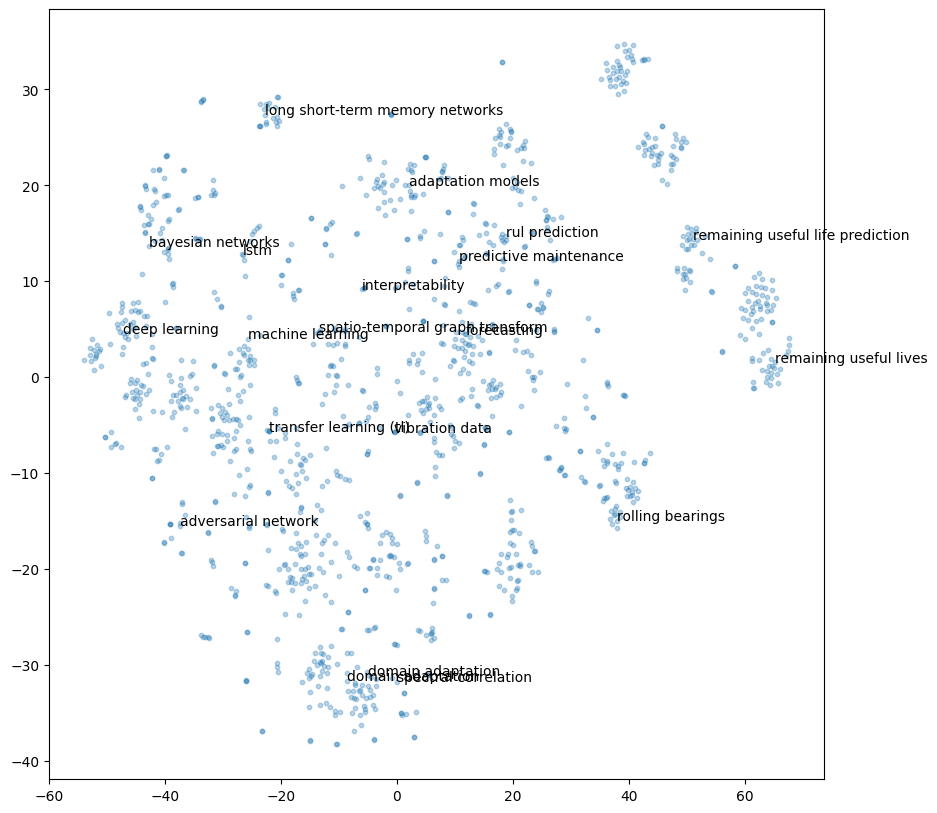

In [63]:
plt.figure(figsize=(10,10))
plt.scatter(X2d[:,0], X2d[:,1], s=10, alpha=0.3)
for _ in range(20):
    i = np.random.randint(len(keywords))
    plt.text(X2d[i,0], X2d[i,1], keywords[i])
plt.show()